# Unsupervised Learning - Clustering

In [1]:
# Nama : Billy Anthony Bingtoyo
# NIM  : 0706022010014

In [2]:
#import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/BillyAnthonyB/DatasetWeek8Newww/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah%20newww.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [4]:
#Cek Missing Values
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [5]:
# fill missing values using simple imputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

In [6]:
#cek missing values lagi
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [7]:
#cek mana yang harus di label encoding
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [8]:
#label encoding semua kolom
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Area Category"] = lb.fit_transform(df["Area Category"])
df["Nama Daerah"] = lb.fit_transform(df["Nama Daerah"])
df["Harga Penawaran (dari Owner)"] = lb.fit_transform(df["Harga Penawaran (dari Owner)"])
df["Terjual/Belum"] = lb.fit_transform(df["Terjual/Belum"])
df["Arah Hadap Rumah"] = lb.fit_transform(df["Arah Hadap Rumah"])
df["Posisi Rumah"] = lb.fit_transform(df["Posisi Rumah"])
df["Lebar Jalan Depan Rumah (ROW)"] = lb.fit_transform(df["Lebar Jalan Depan Rumah (ROW)"])
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0


In [9]:
#standart Scaler
scale = StandardScaler()
scaled = scale.fit_transform(df)
scaled

array([[ 1.00437212, -1.37074241,  0.0647599 , ...,  0.83949741,
        -0.18806854, -0.8255808 ],
       [-1.67782395,  1.04750903, -0.97745709, ...,  0.83949741,
        -0.18806854,  0.22083437],
       [ 1.00437212, -0.36540192, -0.28264577, ..., -1.14184513,
        -5.4539876 , -0.8255808 ],
       ...,
       [-0.78375859,  0.31388219, -0.62012555, ..., -1.14184513,
        -0.18806854, -0.8255808 ],
       [ 1.00437212,  1.18336586, -0.63997731, ...,  0.83949741,
        -0.18806854,  1.26724954],
       [-1.67782395,  1.50942223, -0.16849819, ...,  0.83949741,
        -0.18806854,  1.26724954]])

In [10]:
## K-MEANS CLUSTERING

# set the parameter for evaluating K
ssd = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel.fit(scaled)
    ssd.append(kmeansmodel.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


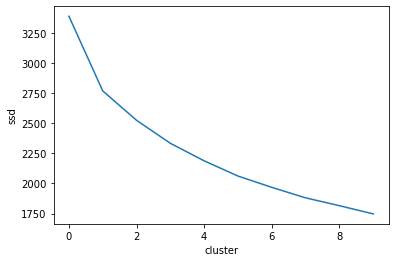

In [11]:

plt.xlabel("cluster")
plt.ylabel("ssd")
plt.plot(ssd)

In [12]:

from kneed import KneeLocator

Knee = KneeLocator(range(1,11), ssd, curve = "convex", direction = "decreasing")
print("the best k for your model is", Knee.elbow)

the best k for your model is 4


In [13]:
kmeans = KMeans(init="random", n_clusters=4, n_init=300, random_state=42).fit(scaled)
label = kmeans.fit_predict(scaled)
label

array([3, 1, 3, 0, 0, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1,
       3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1,
       3, 3, 0, 1, 3, 3, 0, 0, 0, 2, 2, 2, 0, 3, 0, 0, 3, 1, 1, 3, 0, 1,
       1, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 1, 1, 3, 2, 1, 3, 1, 0, 2, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2,
       3, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 3, 1, 0, 1, 0, 2, 3, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 3, 3, 0, 1, 0, 0, 2, 3, 0, 1, 3,
       1, 1, 1, 0, 0, 0, 2, 0, 3, 2, 1, 3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 3, 2, 1, 0, 2, 3, 0, 3, 3, 0, 2, 3, 2, 1,

In [14]:
df["Cluster"] = label
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0,3
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,3
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,0


In [15]:
df["K-Means"] = label
df.groupby("K-Means").agg(Area_Category = ('Area Category',pd.Series.mode),Nama_Daerah = ('Nama Daerah',pd.Series.mode),Luas_Tanah = ('Luas Tanah (m2)', 'mean'),Luas_Bangunan = ('Luas Bangunan (m2)','mean'),Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_mandi = ('Jumlah Kamar Mandi','mean'),Tingkat_Lantai = ('Tingkat/Lantai ','mean'),Harga_Penawaran = ('Harga Penawaran (dari Owner)', 'mean'),Terjual_Belum = ('Terjual/Belum',pd.Series.mode),Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),Count = ("Cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K-Means,,,,,,,,,,,,,
0,1,11,226.760000,302.950000,5.040000,4.200000,2.120000,101.470000,0,1,2,0,100
1,0,"[11, 30, 114]",120.568966,129.137931,2.965517,1.982759,1.629310,62.120690,0,3,2,0,58
2,2,"[11, 28]",617.904762,668.785714,6.357143,5.285714,1.916667,74.690476,0,3,2,2,42
3,3,30,132.222222,150.611111,3.462963,2.509259,1.712963,76.453704,0,3,2,0,108


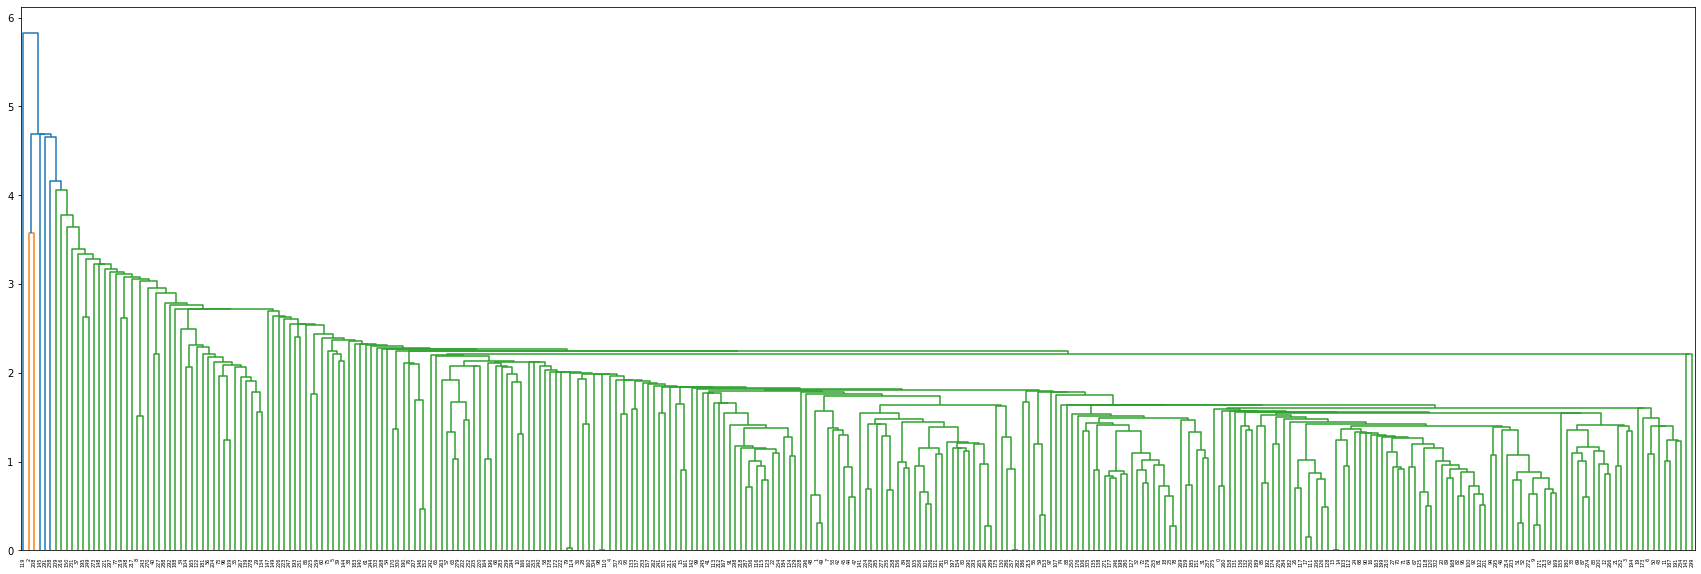

In [16]:
##HIERARCHICAL CLUSTERING

# Membuat Dendogram
plt.figure(figsize=(30,10))
linkage_data = linkage(scaled, method='single')
dendrogram(linkage_data)
plt.show()

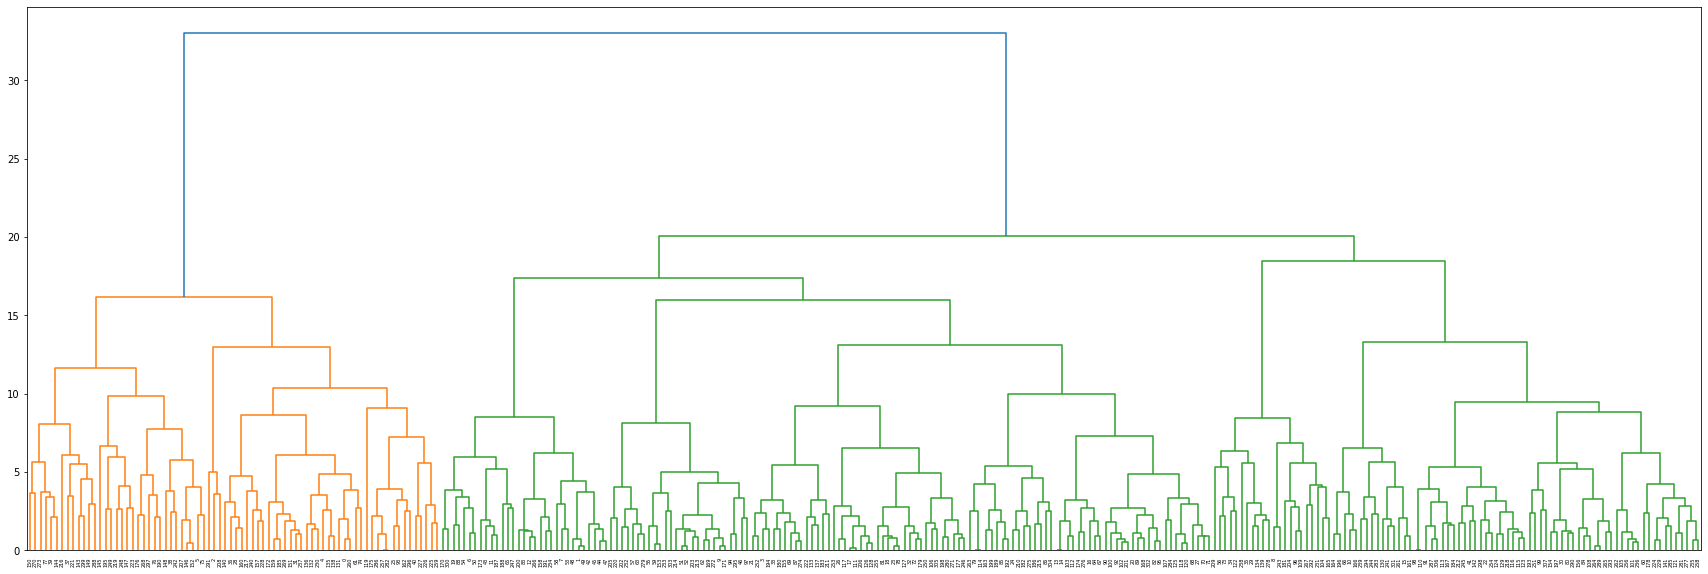

In [17]:
plt.figure(figsize=(30,10))
linkage_data = linkage(scaled, method='ward')
dendrogram(linkage_data)
plt.show()

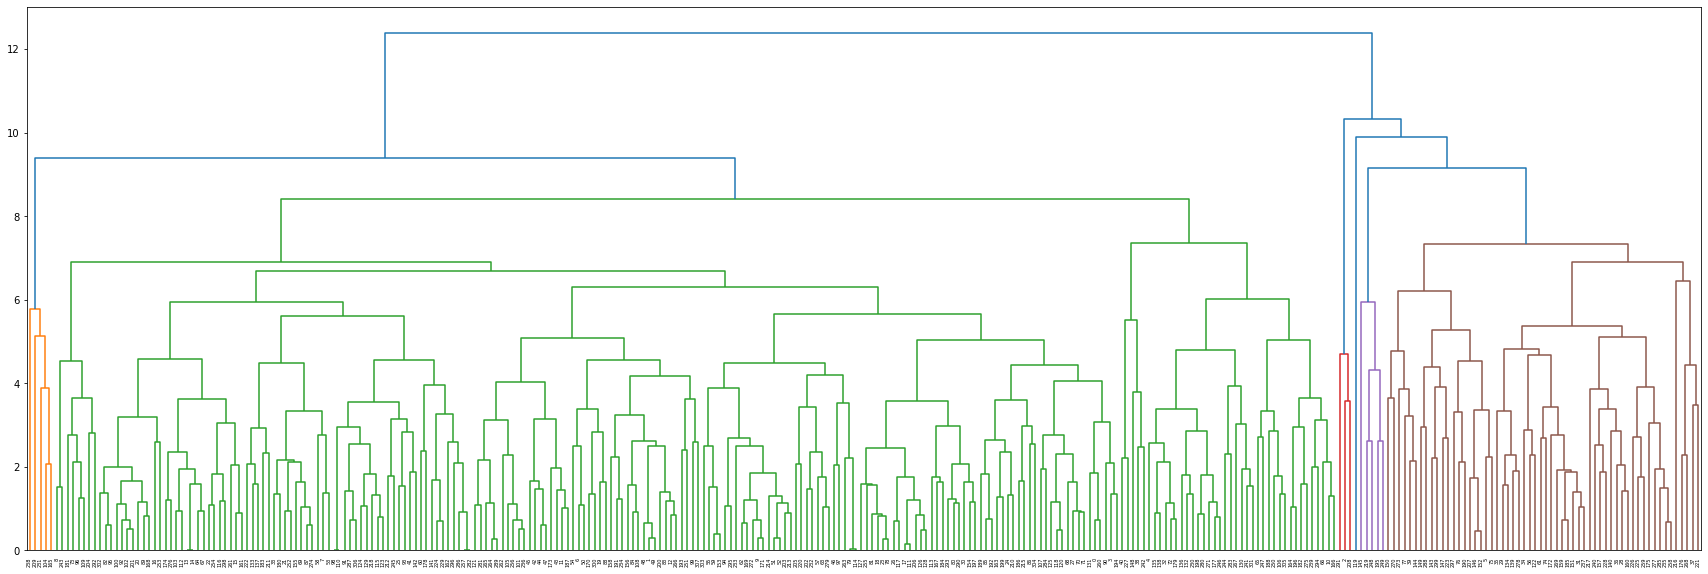

In [18]:
plt.figure(figsize=(30,10))
linkage_data = linkage(scaled, method='complete')
dendrogram(linkage_data)
plt.show()

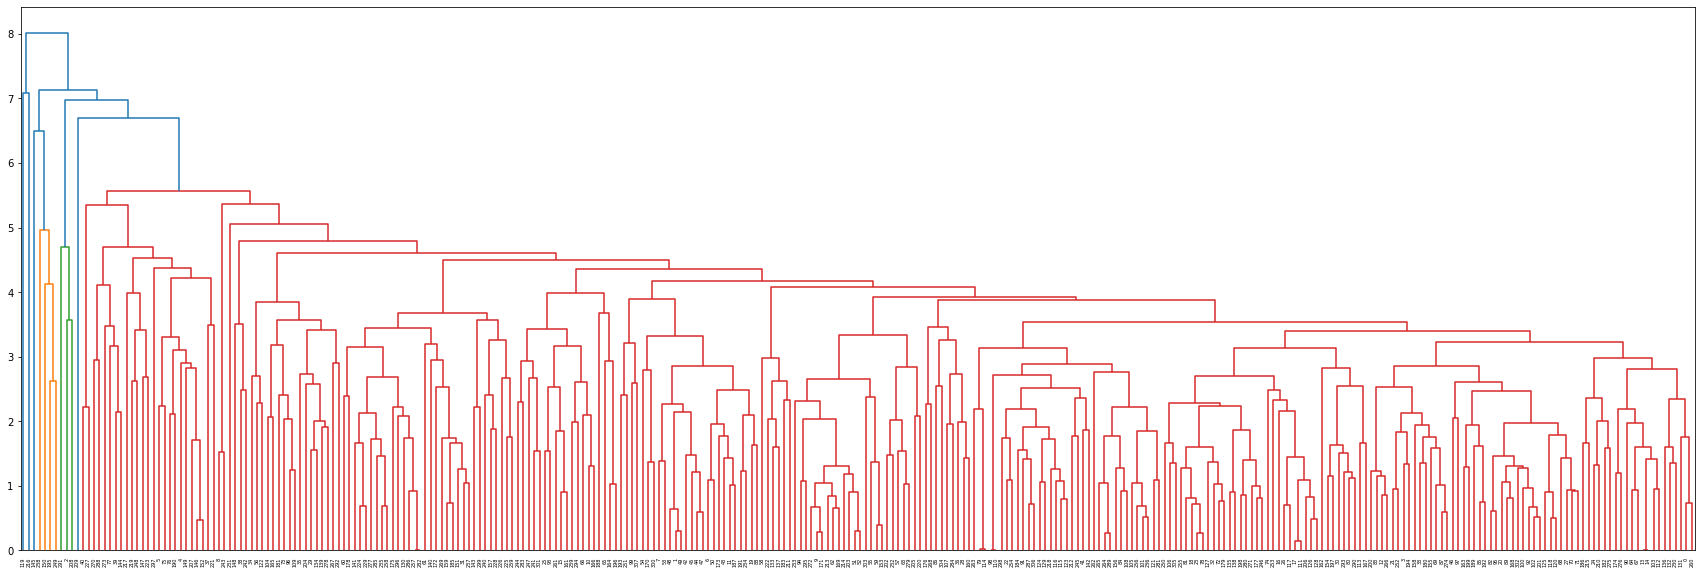

In [19]:
plt.figure(figsize=(30,10))
linkage_data = linkage(scaled, method='average')
dendrogram(linkage_data)
plt.show()

In [20]:
# Melakukan hierarchical clustering dengan ma
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage = "complete")
hp = hierarchical_cluster.fit_predict(scaled)

print(hp)

[0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0]


In [21]:
df["K-Means"] = hp
df.groupby("K-Means").agg(Area_Category = ('Area Category',pd.Series.mode), Nama_Daerah = ('Nama Daerah',pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)','mean'), Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'), Tingkat_Lantai = ('Tingkat/Lantai ','mean'), Harga_Penawaran = ('Harga Penawaran (dari Owner)',pd.Series.mode), Terjual_Belum = ('Terjual/Belum', pd.Series.mode), Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode), Posisi_Rumah = ('Posisi Rumah', pd.Series.mode), Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ("K-Means",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K-Means,,,,,,,,,,,,,
0,3,11,161.182573,189.257261,3.792531,2.825726,1.798755,94,0,3,2,0,241
1,1,11,475.730159,555.698413,5.904762,5.095238,2.055556,"[13, 25, 70, 128, 155, 160, 168]",0,3,2,0,63
2,"[1, 2, 3]","[11, 48, 63]",281.666667,390.000000,6.000000,4.333333,2.333333,"[23, 74, 117]",0,3,0,0,3
3,3,42,240.000000,350.000000,13.000000,13.000000,2.000000,75,0,1,2,2,1
